In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
dataset=pd.read_csv('train.csv')

In [3]:
data=dataset.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
X=data.iloc[:,:-1]

In [6]:
y=data.iloc[:,-1]

In [7]:
numerical_features=[feature for feature in X.columns if X[feature].dtype!='object']

In [8]:
categorical_features=[feature for feature in X.columns if feature not in numerical_features]

In [9]:
dis_num_features=[feature for feature in numerical_features if len(X[feature].unique())<20]

In [10]:
for feature in categorical_features:
    a=X[feature].unique()
    b=len(a)
    print(f'The feature {feature} has {b} categories which are as: {a}')    
    print('\n\n')

The feature Item_Identifier has 1559 categories which are as: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']



The feature Item_Fat_Content has 5 categories which are as: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']



The feature Item_Type has 16 categories which are as: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']



The feature Outlet_Identifier has 10 categories which are as: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']



The feature Outlet_Size has 4 categories which are as: ['Medium' nan 'High' 'Small']



The feature Outlet_Location_Type has 3 categories which are as: ['Tier 1' 'Tier 3' 'Tier 2']



The feature Outlet_Type has 4 categories which are as: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']





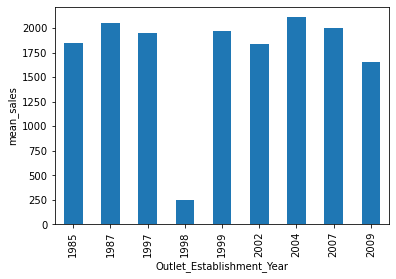

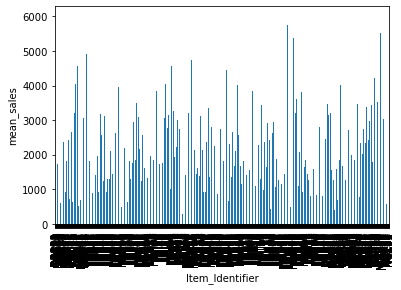

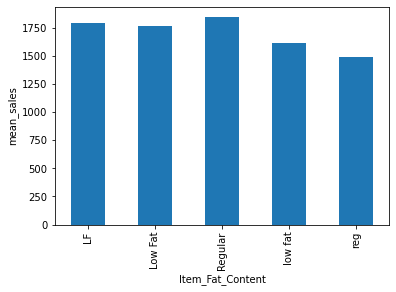

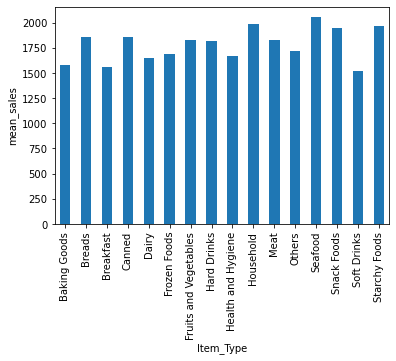

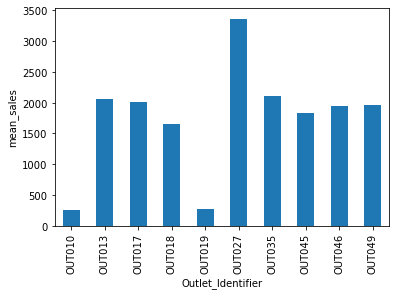

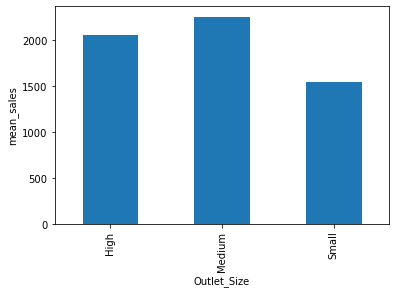

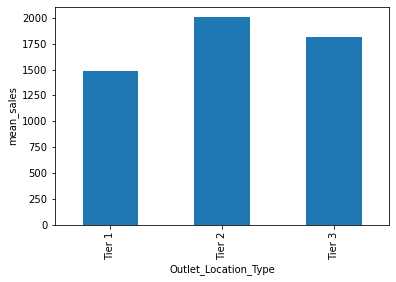

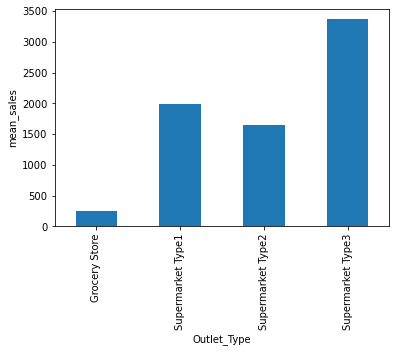

In [11]:
for feature in dis_num_features+categorical_features:
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('mean_sales')
    plt.show()

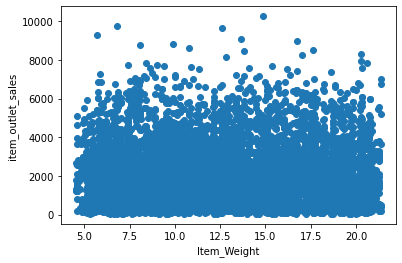

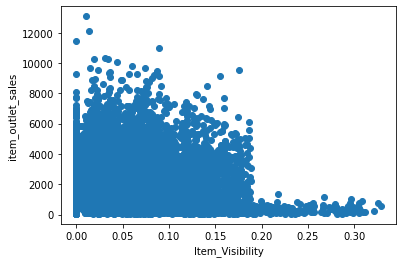

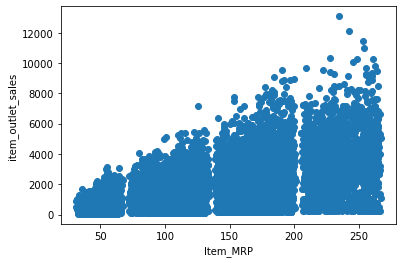

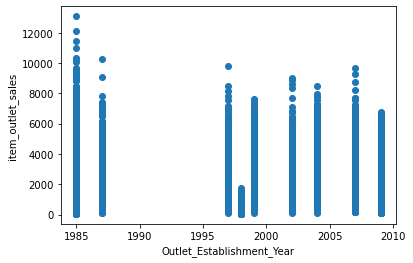

In [29]:
for feature in numerical_features:
    plt.scatter(x=X[feature],y=y)
    plt.xlabel(feature)
    plt.ylabel('item_outlet_sales')
    plt.show()

In [195]:
data=dataset.copy()


In [5]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='object']

In [8]:
data

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Oulet_Year
0,0,1810.9760,9.300,1765.0358,0.016047,1650.8511,249.8092,1966.1074,2251.0698,1487.3972,1990.7420,3735.1380,14
1,1,1496.7184,5.920,1844.5989,0.019278,1518.0240,48.2692,1655.1788,2251.0698,1812.3076,1655.1788,443.4228,4
2,2,1810.9760,17.500,1765.0358,0.016760,1829.6184,141.6180,1966.1074,2251.0698,1487.3972,1990.7420,2097.2700,14
3,3,1810.9760,19.200,1844.5989,0.068513,1830.9500,182.0950,250.3408,1484.0682,1812.3076,256.9988,732.3800,15
4,4,1874.8928,8.930,1765.0358,0.061322,1981.4208,53.8614,2050.6640,2050.6640,1812.3076,1990.7420,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8518,1810.9760,6.865,1765.0358,0.056783,1944.1360,214.5218,2050.6640,2050.6640,1812.3076,1990.7420,2778.3834,26
8519,8519,1810.9760,8.380,1844.5989,0.046982,1577.9460,108.1570,1834.9448,1484.0682,2004.0580,1990.7420,549.2850,11
8520,8520,1874.8928,10.600,1765.0358,0.035186,1669.4935,85.1224,2109.2544,1484.0682,2004.0580,1990.7420,1193.1136,9
8521,8521,1810.9760,7.210,1844.5989,0.145221,1944.1360,103.1332,1655.1788,2251.0698,1812.3076,1655.1788,1845.5976,4


# As item weight is having not any specific correlation with sales we should replace all nan values of item weight with mean weights

In [7]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

size_dict=data.groupby('Outlet_Size')['Item_Outlet_Sales'].median().to_dict()

size_dict



si=[]
for item in data[data['Outlet_Size'].isnull()]['Item_Outlet_Sales']:
    if  item<size_dict['Small']:
        si.append('Small')
    elif size_dict['Small']<item<size_dict['Medium']:
        si.append('Medium')
    elif size_dict['Medium']<item<size_dict['High']:
        si.append(size_dict['High'])
    else:
        si.append('High')

j=0
for i in list(data[data['Outlet_Size'].isnull()]['Outlet_Size'].index):
    data['Outlet_Size'].loc[i]=si[j]
    j+=1

data['Item_Fat_Content']=data['Item_Fat_Content'].map({'Low Fat':'LF','low fat':'LF','Regular':'reg','reg':'reg','LF':'LF'})

for feature in categorical_features:
    a=data.groupby(feature)['Item_Outlet_Sales'].median().to_dict()
    data[feature]=data[feature].map(a)

b=data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().to_dict()

data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].map(b)

data['Item_Identifier']=data['Item_Identifier'].map(data['Item_Identifier'].value_counts().to_dict())

X=data.iloc[:,:-1]

y=data.iloc[:,-1]

KeyError: 'Outlet_Establishment_Year'

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [52]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='mse')

In [53]:
from sklearn.model_selection import GridSearchCV
parameters={'min_samples_split':[2,3,4],'min_samples_leaf':[1,2]}
dec_regressor=GridSearchCV(estimator=regressor,param_grid=parameters)

In [63]:
dec_regressor.fit(X,y)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: Futur

GridSearchCV(estimator=DecisionTreeRegressor(criterion='mse'),
             param_grid={'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [64]:
pred=dec_regressor.predict(X)

In [60]:
from sklearn.metrics import r2_score

In [65]:
r2_score(y,pred)

0.9477304681586219

In [27]:
test=pd.read_csv('test.csv')

In [28]:
test['Item_Weight']=test['Item_Weight'].fillna(X['Item_Weight'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int64  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   float64
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   float64
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   float64
 7   Outlet_Establishment_Year  5681 non-null   float64
 8   Outlet_Size                4075 non-null   float64
 9   Outlet_Location_Type       5681 non-null   float64
 10  Outlet_Type                5681 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 488.3 KB


In [31]:
categorical_features.remove('Item_Identifier')

In [32]:
test['Item_Fat_Content']=test['Item_Fat_Content'].map({'Low Fat':'LF','low fat':'LF','Regular':'reg','reg':'reg','LF':'LF'})

for feature in categorical_features:
    a=dataset.groupby(feature)['Item_Outlet_Sales'].median().to_dict()
    test[feature]=test[feature].map(a)

b=dataset.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().to_dict()

test['Outlet_Establishment_Year']=test['Outlet_Establishment_Year'].map(b)

test['Item_Identifier']=test['Item_Identifier'].map(dataset['Item_Identifier'].value_counts().to_dict())

In [33]:
a=dataset.groupby('Outlet_Size')['Item_Outlet_Sales'].median().to_dict()

In [34]:
d=np.mean(list(a.values()))

In [35]:
test['Outlet_Size']=test['Outlet_Size'].fillna(d)

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int64  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   float64
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   float64
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   float64
 7   Outlet_Establishment_Year  5681 non-null   float64
 8   Outlet_Size                5681 non-null   float64
 9   Outlet_Location_Type       5681 non-null   float64
 10  Outlet_Type                5681 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 488.3 KB


In [55]:
pred=dec_regressor.predict(X)

In [56]:
r2_score(y,pred)

0.7713417398845389

In [258]:
test1=X.iloc[1000:2000]

In [260]:
result1=y.iloc[1000:2000]

In [261]:
result1

1000    1885.5456
1001     703.0848
1002    2656.5420
1003     713.0718
1004    1691.7978
          ...    
1995     732.3800
1996    6751.2120
1997     306.2680
1998    8239.9408
1999     193.0820
Name: Item_Outlet_Sales, Length: 1000, dtype: float64

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [69]:
regression=LinearRegression()

In [75]:
score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [76]:
np.mean(score)

-1250173.183919877

In [77]:
regression.fit(X_train,y_train)

LinearRegression()

In [78]:
pred=regression.predict(X_test)

In [79]:
r2_score(y_test,pred)

0.5607947068220387

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
regression=RandomForestRegressor(criterion='mse')

In [92]:
parameters={'min_samples_split':[2,3,4],'min_samples_leaf':[1,2]}

In [93]:
dec_regressor=GridSearchCV(estimator=regression,param_grid=parameters)

In [94]:
dec_regressor.fit(X_train,y_train)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion '

GridSearchCV(estimator=RandomForestRegressor(criterion='mse'),
             param_grid={'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [99]:
pred=dec_regressor.predict(X_test)

In [100]:
r2_score(y_test,pred)

0.5975343794758443

In [101]:
from sklearn.svm import SVR

In [102]:
regression=SVR(kernel='rbf')

In [104]:
regression.fit(X_train,y_train)

SVR()

In [105]:
pred=regression.predict(X_test)

In [106]:
r2_score(y_test,pred)

0.09140873315942966

In [107]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [124]:
parameters={'max_depth':[3,4,5,6,7],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2]}

In [125]:
dec_regressor=GridSearchCV(estimator=regressor,param_grid=parameters)

In [126]:
dec_regressor.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [127]:
pred=dec_regressor.predict(X_test)

In [128]:
r2_score(y_test,pred)

0.5994976245522333

In [132]:
data.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.056204,0.035269,0.030209,0.015139,0.003908,-0.012010,-0.011839,0.007549,0.010466,-0.011577,-0.018349
Item_Weight,0.056204,1.000000,-0.021157,-0.012049,0.034015,0.024756,-0.000916,-0.001637,0.008584,-0.009400,-0.002107,0.011550
Item_Fat_Content,0.035269,-0.021157,1.000000,0.047314,-0.032061,0.006063,0.002089,-0.000266,0.009720,-0.003736,0.002010,0.018719
Item_Visibility,0.030209,-0.012049,0.047314,1.000000,-0.013134,-0.001315,-0.237521,-0.181904,-0.121650,-0.074954,-0.239150,-0.128625
Item_Type,0.015139,0.034015,-0.032061,-0.013134,1.000000,0.079623,0.011264,-0.001229,0.016732,0.008996,0.011415,0.054237
Item_MRP,0.003908,0.024756,0.006063,-0.001315,0.079623,1.000000,-0.000543,0.002026,0.154083,0.001757,-0.001062,0.567574
Outlet_Identifier,-0.012010,-0.000916,0.002089,-0.237521,0.011264,-0.000543,1.000000,0.566753,0.363533,0.215930,0.995888,0.489391
Outlet_Establishment_Year,-0.011839,-0.001637,-0.000266,-0.181904,-0.001229,0.002026,0.566753,1.000000,0.240974,-0.001726,0.553688,0.286885
Outlet_Size,0.007549,0.008584,0.009720,-0.121650,0.016732,0.154083,0.363533,0.240974,1.000000,0.170471,0.369488,0.354933
Outlet_Location_Type,0.010466,-0.009400,-0.003736,-0.074954,0.008996,0.001757,0.215930,-0.001726,0.170471,1.000000,0.205530,0.106349


In [137]:
data=dataset.copy()

In [147]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].median())

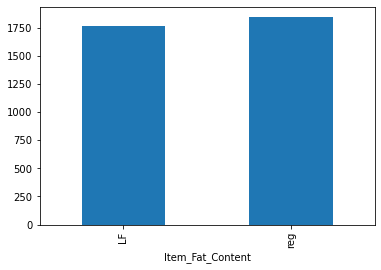

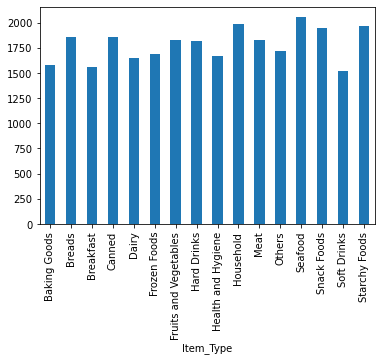

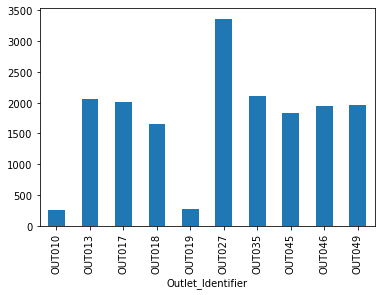

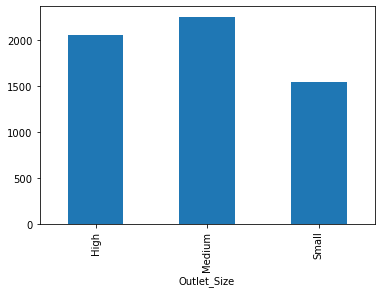

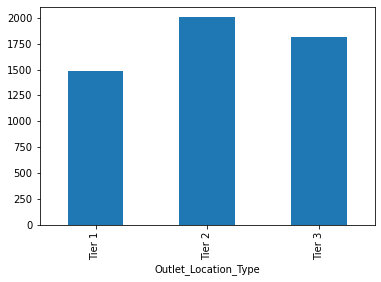

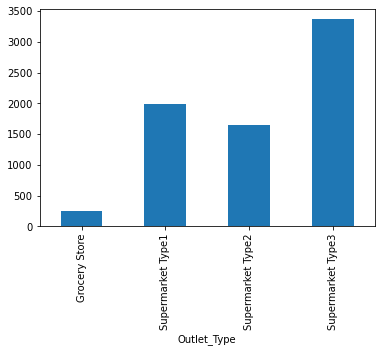

In [153]:
for feature in categorical_features:
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.show()

In [152]:
data['Item_Fat_Content']=data['Item_Fat_Content'].map({'LF':'LF','Regular':'reg','reg':'reg','low fat':'LF','Low Fat':'LF'})

In [155]:
for feature in categorical_features:
    print(feature)
    print(data.groupby(feature).groups.keys())
    print('\n')

Item_Fat_Content
dict_keys(['LF', 'reg'])


Item_Type
dict_keys(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'])


Outlet_Identifier
dict_keys(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049'])


Outlet_Size
dict_keys(['High', 'Medium', 'Small'])


Outlet_Location_Type
dict_keys(['Tier 1', 'Tier 2', 'Tier 3'])


Outlet_Type
dict_keys(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])




In [162]:
data['Outlet_Identifier']=data['Outlet_Identifier'].apply(lambda x:int(x[4:6]))

In [171]:
data['Outlet_Size']=data['Outlet_Size'].map({'High':1,'Medium':2,'Small':3})

In [173]:
data['Outlet_Size']=data['Outlet_Size'].fillna(0)

In [175]:
data['Outlet_Location_Type']=data['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})

In [176]:
data['Outlet_Type']=data['Outlet_Type'].map({'Grocery Store':1, 'Supermarket Type1':2, 'Supermarket Type2':3, 'Supermarket Type3':4})

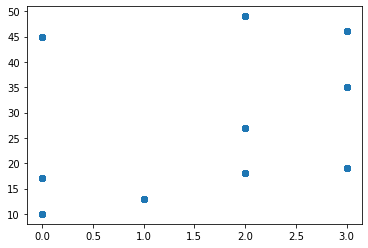

In [183]:
plt.scatter(x=data['Outlet_Size'],y=data['Outlet_Identifier'])

In [232]:
numerical_features

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [218]:
for feature in categorical_features:
    di=data.groupby(feature)['Item_Outlet_Sales'].median().to_dict()
    di1={}
    li=sorted(di,key=lambda x:di[x])
    for i in range(len(li)):    
        di1[li[i]]=i+1
    data[feature]=data[feature].map(di1)    

In [226]:
di=data.groupby('Item_Outlet_Sales')['Item_Outlet_Sales'].median().to_dict()
    di1={}
    li=sorted(di,key=lambda x:di[x])
    for i in range(len(li)):    
        di1[li[i]]=i+1
    data['Item_Outlet_Sales']=data['It'].map(di1)    

1559

In [233]:
dis_features=['Item_Identifier','Outlet_Establishment_Year']

In [234]:
for feature in dis_features:
    di=data.groupby(feature)['Item_Outlet_Sales'].median().to_dict()
    di1={}
    li=sorted(di,key=lambda x:di[x])
    for i in range(len(li)):    
        di1[li[i]]=i+1
    data[feature]=data[feature].map(di1)

In [236]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [238]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [241]:
regressor=DecisionTreeRegressor(criterion='mse')

In [243]:
parameters={'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 2]}

In [245]:
dec_regressor=GridSearchCV(estimator=regressor,param_grid=parameters)

In [246]:
dec_regressor.fit(X_train,y_train)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: Futur

GridSearchCV(estimator=DecisionTreeRegressor(criterion='mse'),
             param_grid={'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [250]:
pred=dec_regressor.predict(X_test)

In [251]:
r2_score(y_test,pred)

0.3417815188665382

In [255]:
data.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.012923,0.032465,-0.025440,0.098577,0.843748,0.052580,0.029458,0.024836,0.014261,0.063412,0.614865
Item_Weight,0.012923,1.000000,-0.021092,-0.014168,0.032435,0.024951,-0.001235,0.010831,0.003878,-0.005655,-0.004790,0.009693
Item_Fat_Content,0.032465,-0.021092,1.000000,0.047314,-0.034525,0.006063,0.000696,0.000286,0.003470,-0.003795,0.001648,0.018719
Item_Visibility,-0.025440,-0.014168,0.047314,1.000000,-0.013417,-0.001315,-0.179587,-0.110670,-0.092194,-0.076912,-0.240713,-0.128625
Item_Type,0.098577,0.032435,-0.034525,-0.013417,1.000000,0.076230,0.008076,-0.002810,0.009040,0.009300,0.009470,0.052526
Item_MRP,0.843748,0.024951,0.006063,-0.001315,0.076230,1.000000,0.000805,0.004638,-0.000356,0.001887,-0.000551,0.567574
Outlet_Identifier,0.052580,-0.001235,0.000696,-0.179587,0.008076,0.000805,1.000000,0.715268,0.285484,0.274526,0.847676,0.407932
Outlet_Establishment_Year,0.029458,0.010831,0.000286,-0.110670,-0.002810,0.004638,0.715268,1.000000,-0.040861,0.203073,0.450832,0.166617
Outlet_Size,0.024836,0.003878,0.003470,-0.092194,0.009040,-0.000356,0.285484,-0.040861,1.000000,-0.485996,0.257268,0.213691
Outlet_Location_Type,0.014261,-0.005655,-0.003795,-0.076912,0.009300,0.001887,0.274526,0.203073,-0.485996,1.000000,0.214351,0.099404


In [256]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,-100,-90,-80,-70,-10,-5,-2,-1,1,5,10,20,30,35,40,45,50,55,100]}
elastic_regressor=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)

elastic_regressor.fit(X_train,y_train)
print(elastic_regressor.best_params_)
print(elastic_regressor.best_score_)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.765e+09, tolerance: 1.365e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.728e+09, tolerance: 1.349e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.831e+09, tolerance: 1.3

{'alpha': 0.001}
-1166783.320672189


C:\Users\H p\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\H p\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 913, in fit
    check_scalar(
  File "C:\Users\H p\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1480, in check_scalar
    raise ValueError(
ValueError: alpha == -100, must be >= 0.0.

------------

In [258]:
pred=elastic_regressor.predict(X_test)

In [259]:
r2_score(y_test,pred)

0.6017604806611265

In [260]:
df=dataset.copy()

In [267]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='object']

In [268]:
categorical_features=[feature for feature in df.columns if feature not in numerical_features]

In [354]:
for feature in categorical_features+['Item_Identifier']:
    print(feature+'//mod')
    print(df.groupby(feature+'//mod').groups.keys())

Item_Fat_Content//mod
dict_keys([1, 2])
Item_Type//mod
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
Outlet_Identifier//mod
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Outlet_Size//mod
dict_keys([1, 2, 3, 4])
Outlet_Location_Type//mod
dict_keys([1, 2, 3])
Outlet_Type//mod
dict_keys([1, 2, 3, 4])
Item_Identifier//mod
dict_keys([1, 2, 3])


In [333]:
df['Item_Identifier'+'trans']=df['Item_Identifier'].apply(lambda x:x[-1:-3:-1])

di={}
i=1
for item in list(df['Item_Identifiertrans'].unique()):
   di[item]=i 
   i+=1 

df['Item_Identifiertrans']=df['Item_Identifiertrans'].map(di)

df[['Item_Identifiertrans','Item_Outlet_Sales']].corr()

In [447]:
df['Item_Identifier//out']=df['Item_Identifier'].apply(lambda x:x[3])

di={}
i=1
for item in list(df['Item_Identifier//out'].unique()):
   di[item]=i 
   i+=1 

df['Item_Identifier//out']=df['Item_Identifier//out'].map(di)

df[['Item_Identifier//out','Item_Outlet_Sales']].corr()

,Item_Identifier//out,Item_Outlet_Sales
Item_Identifier//out,1.000000,0.014335
Item_Outlet_Sales,0.014335,1.000000


In [340]:
df['Item_Fat_Content']=df['Item_Fat_Content'].map({'LF':'LF','Regular':'reg','reg':'reg','low fat':'LF','Low Fat':'LF'})

In [345]:
categorical_features.remove('Item_Identifier')

In [346]:
for feature in categorical_features:
    di={}
    i=1
    for item in list(df[feature].unique()):
       di[item]=i 
       i+=1 

    df[feature+'//mod']=df[feature].map(di)

In [421]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content//mod,Item_Type//mod,Outlet_Identifier//mod,Outlet_Size//mod,Outlet_Location_Type//mod,Outlet_Type//mod,Item_Identifier//mod,Item_Identifier//out
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,1,1,1,1,1,1,1
1,DRC01,5.920,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2,2,2,1,2,2,2,2
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,3,1,1,1,1,1,1
3,FDX07,19.200,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,2,4,3,2,2,3,1,3
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,5,4,3,2,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,1,7,4,3,2,1,1,16
8519,FDS36,8.380,reg,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,2,6,6,2,3,1,1,5
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,1,10,9,4,3,1,3,27
8521,FDN46,7.210,reg,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,2,7,2,1,2,2,1,11


In [352]:
df['Item_Identifier//mod']=df['Item_Identifiertrans']

In [353]:
df.drop(columns='Item_Identifiertrans',inplace=True)

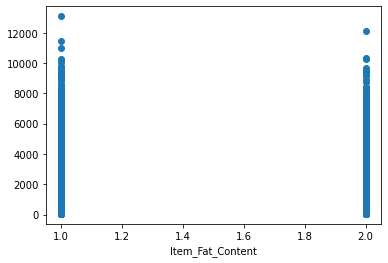

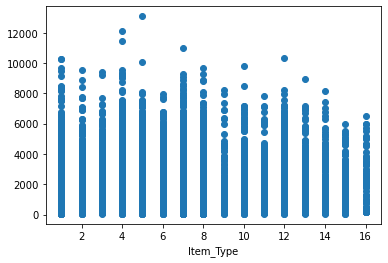

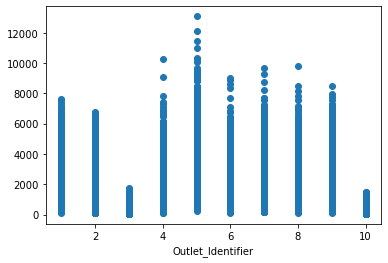

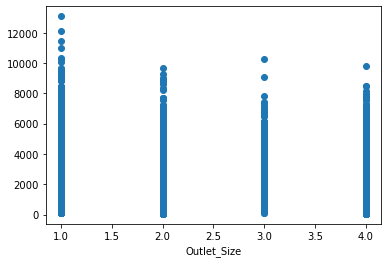

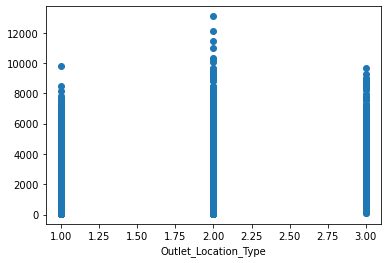

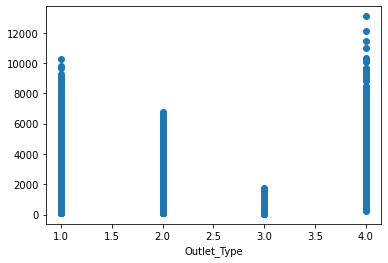

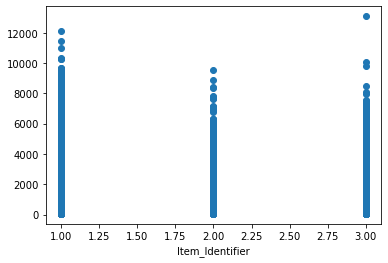

In [358]:
for feature in categorical_features+['Item_Identifier']:
    plt.scatter(x=df[feature+'//mod'],y=df['Item_Outlet_Sales'])
    plt.xlabel(feature)
    plt.show()
    

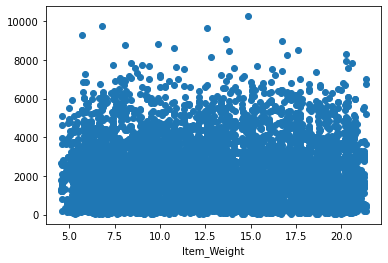

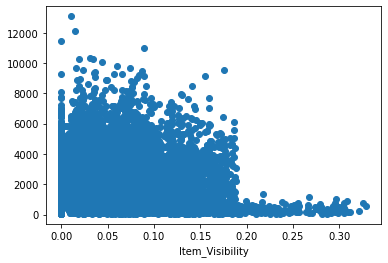

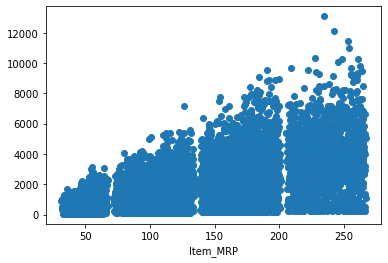

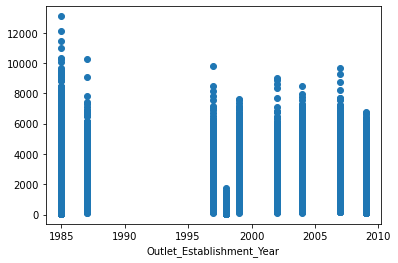

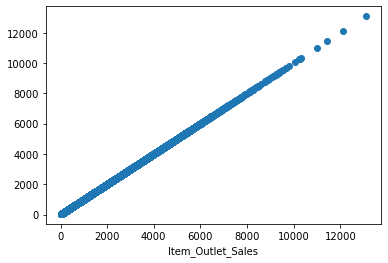

In [382]:
for feature in numerical_features:
    plt.scatter(x=df[feature],y=df['Item_Outlet_Sales'])
    plt.xlabel(feature)
    plt.show()

In [452]:
a=df.groupby('Outlet_Establishment_Year')

1985


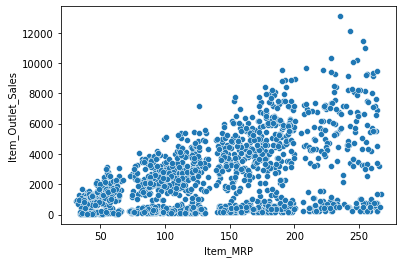

1987


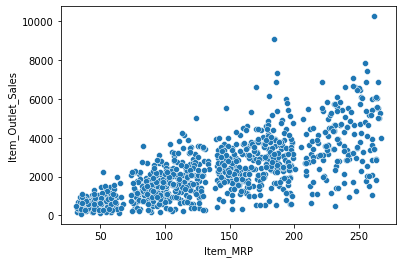

1997


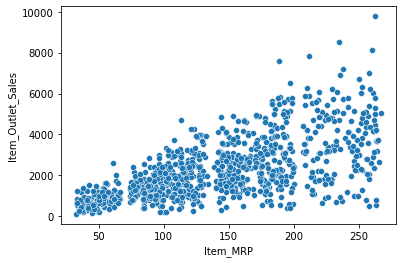

1998


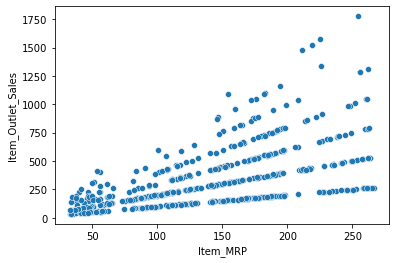

1999


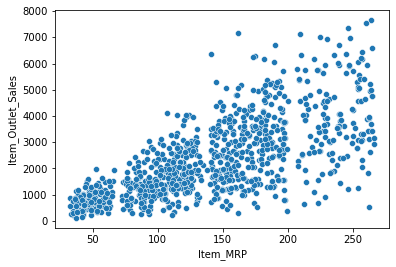

2002


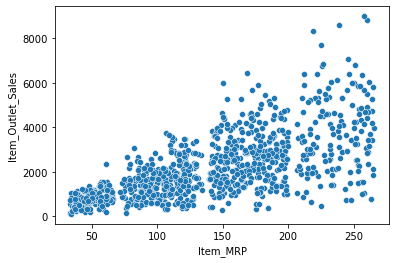

2004


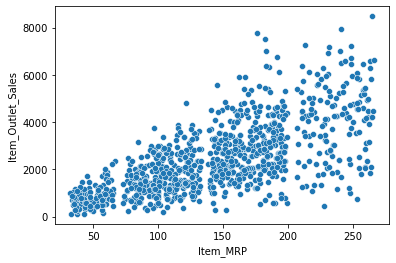

2007


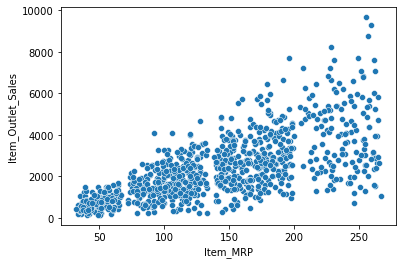

2009


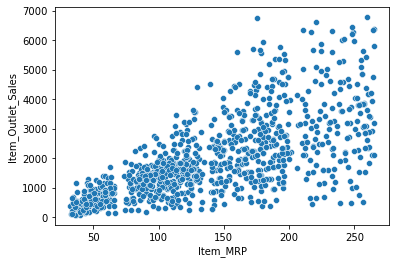

In [453]:
for i in a:
    sns.scatterplot(x=i[1]['Item_MRP'],y=i[1]['Item_Outlet_Sales'])
    print(i[0])
    plt.show()

In [450]:
a.groups.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7])

In [446]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [569]:
df2=df.drop(columns=categorical_features+['Item_Identifier//out','Item_Identifier'])

In [570]:
pd.crosstab(df2['Outlet_Size//mod'],df2['Outlet_Type//mod'])

Outlet_Type//mod,1,2,3,4
Outlet_Size//mod,,,,
1,930,928,0,935
2,1855,0,555,0
3,932,0,0,0
4,1860,0,528,0


# Considering 932 stores of size as 4th size


In [630]:
data1['Outlet_Size']=data['Outlet_Size'].map({'High':1,'Medium':2,'Small':3})

In [633]:
data1['Outlet_Size']=data['Outlet_Size']

In [572]:
df2.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content//mod,Item_Type//mod,Outlet_Identifier//mod,Outlet_Size//mod,Outlet_Location_Type//mod,Outlet_Type//mod,Item_Identifier//mod
0,9.30,0.016047,249.8092,1999,3735.1380,1,1,1,1,1,1,1
1,5.92,0.019278,48.2692,2009,443.4228,2,2,2,1,2,2,2
2,17.50,0.016760,141.6180,1999,2097.2700,1,3,1,1,1,1,1
3,19.20,0.000000,182.0950,1998,732.3800,2,4,3,2,2,3,1
4,8.93,0.000000,53.8614,1987,994.7052,1,5,4,4,2,1,3


In [573]:
ohe=[]
for feature in df2.columns:
    if len(df2[feature].unique())<=4:
        ohe.append(feature)

In [574]:
df2['Item_Visibility']=df2['Item_Visibility'].apply(lambda x:df2['Item_Visibility'].median() if x==0 else x)

In [575]:
df2['Item_Weight']=df2['Item_Weight'].fillna(df2['Item_Weight'].median())

In [551]:
for feature in categorical_features:
    a=df2[feature+'//mod'].value_counts().to_dict()
    df2[feature+'//mod']=df2[feature+'//mod'].map(a)

In [576]:
df3=pd.get_dummies(df2,columns=ohe,drop_first=True)

In [642]:
X=data1.drop(columns=['Item_Outlet_Sales'])

In [643]:
y=data1['Item_Outlet_Sales']

In [644]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,train_test_split

In [645]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [646]:
regressor=DecisionTreeRegressor(criterion='mse')

In [647]:
parameters={'min_samples_leaf':[2,3],'min_samples_split':[2,3,4],'max_depth':[3,4,5]}

In [648]:
dec_regressor=GridSearchCV(estimator=regressor,param_grid=parameters)

In [649]:
dec_regressor.fit(X_train,y_train)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: Futur

C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: Futur

C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: Futur

GridSearchCV(estimator=DecisionTreeRegressor(criterion='mse'),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3, 4]})

In [650]:
pred=dec_regressor.predict(X_test)

In [651]:
r2_score(y_test,pred)

0.5951559121466917

In [652]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(criterion='mse')

In [653]:
ran_regressor=GridSearchCV(estimator=regressor,param_grid=parameters)

In [654]:
ran_regressor.fit(X_train,y_train)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion '

C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion '

C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion '

GridSearchCV(estimator=RandomForestRegressor(criterion='mse'),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3, 4]})

In [567]:
pred=ran_regressor.predict(X_test)

In [568]:
r2_score(y_test,pred)

0.5648396803384792

In [619]:
data1=df.iloc[:,:-8]

In [611]:
data1['Item_Identifier']=data1['Item_Identifier'].apply(lambda x:x[2])

In [634]:
data1.drop(columns='Item_Weight',inplace=True)

In [597]:
data1['Item_Type']=data1['Item_Type'].map(data1.groupby('Item_Type')['Item_Outlet_Sales'].mean().to_dict())

In [635]:
data1['Item_Identifier']=data1['Item_Identifier'].apply(lambda x :x[0:2])

In [636]:
for feature in categorical_features:
    data1[feature]=data1[feature].map(data1.groupby(feature)['Item_Outlet_Sales'].mean().to_dict())

In [637]:
data1.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,2215.354223,2157.711534,0.016047,2232.542597,249.8092,2348.354635,1999,2681.603542,1876.909159,2316.181148,3735.1380
1,1997.333337,2224.561170,0.019278,2006.511735,48.2692,1995.498739,2009,2681.603542,2279.627651,1995.498739,443.4228
2,2215.354223,2157.711534,0.016760,2158.977911,141.6180,2348.354635,1999,2681.603542,1876.909159,2316.181148,2097.2700
3,2215.354223,2224.561170,0.000000,2289.009592,182.0950,339.351662,1998,1822.626947,2279.627651,339.828500,732.3800
4,2142.721364,2157.711534,0.000000,2258.784300,53.8614,2298.995256,1987,2298.995256,2279.627651,2316.181148,994.7052


In [638]:
data1['Outlet_Establishment_Year']=data1['Outlet_Establishment_Year'].map(data1.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().to_dict())

In [639]:
data1

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,2215.354223,2157.711534,0.016047,2232.542597,249.8092,2348.354635,2348.354635,2681.603542,1876.909159,2316.181148,3735.1380
1,1997.333337,2224.561170,0.019278,2006.511735,48.2692,1995.498739,1995.498739,2681.603542,2279.627651,1995.498739,443.4228
2,2215.354223,2157.711534,0.016760,2158.977911,141.6180,2348.354635,2348.354635,2681.603542,1876.909159,2316.181148,2097.2700
3,2215.354223,2224.561170,0.000000,2289.009592,182.0950,339.351662,339.351662,1822.626947,2279.627651,339.828500,732.3800
4,2142.721364,2157.711534,0.000000,2258.784300,53.8614,2298.995256,2298.995256,2298.995256,2279.627651,2316.181148,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,2215.354223,2157.711534,0.056783,2277.321739,214.5218,2298.995256,2298.995256,2298.995256,2279.627651,2316.181148,2778.3834
8519,2215.354223,2224.561170,0.046982,1952.971207,108.1570,2192.384798,2192.384798,1822.626947,2323.990559,2316.181148,549.2850
8520,2142.721364,2157.711534,0.035186,2010.000265,85.1224,2438.841866,2438.841866,1912.149161,2323.990559,2316.181148,1193.1136
8521,2215.354223,2224.561170,0.145221,2277.321739,103.1332,1995.498739,1995.498739,2681.603542,2279.627651,1995.498739,1845.5976


In [640]:
data1['Item_Visibility']=data1['Item_Visibility'].apply(lambda x:data1['Item_Visibility'].median() if x==0 else x)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,2215.354223,2157.711534,0.016047,2232.542597,249.8092,2348.354635,2348.354635,2681.603542,1876.909159,2316.181148,3735.1380
1,1997.333337,2224.561170,0.019278,2006.511735,48.2692,1995.498739,1995.498739,2681.603542,2279.627651,1995.498739,443.4228
2,2215.354223,2157.711534,0.016760,2158.977911,141.6180,2348.354635,2348.354635,2681.603542,1876.909159,2316.181148,2097.2700
3,2215.354223,2224.561170,0.053931,2289.009592,182.0950,339.351662,339.351662,1822.626947,2279.627651,339.828500,732.3800
4,2142.721364,2157.711534,0.053931,2258.784300,53.8614,2298.995256,2298.995256,2298.995256,2279.627651,2316.181148,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,2215.354223,2157.711534,0.056783,2277.321739,214.5218,2298.995256,2298.995256,2298.995256,2279.627651,2316.181148,2778.3834
8519,2215.354223,2224.561170,0.046982,1952.971207,108.1570,2192.384798,2192.384798,1822.626947,2323.990559,2316.181148,549.2850
8520,2142.721364,2157.711534,0.035186,2010.000265,85.1224,2438.841866,2438.841866,1912.149161,2323.990559,2316.181148,1193.1136
8521,2215.354223,2224.561170,0.145221,2277.321739,103.1332,1995.498739,1995.498739,2681.603542,2279.627651,1995.498739,1845.5976


In [659]:
from sklearn import metrics
rf=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=43, verbose=0, warm_start=False)
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
results = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
results.head()


C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


,Actual,Predicted
2390,3845.6608,4021.83148
2466,1800.3232,3934.61168
7357,1549.9824,3747.45530
308,1039.9796,1032.32290
2883,3113.2808,4567.78748


In [661]:
data=dataset.copy()

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

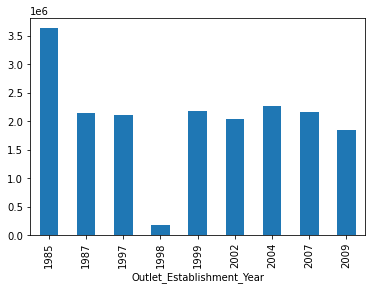

In [679]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().plot.bar()

In [683]:
df['Outlet_Year']=df['Outlet_Establishment_Year'].apply(lambda x: 2013-x)

In [705]:
s=data['Item_Weight'].map(data.groupby('Item_Type//mod')['Item_Weight'].median().to_dict())

In [692]:
data=df.drop(columns=categorical_features)

In [720]:
data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Type//mod')['Item_Weight'].transform('mean'))

# Using Knearest Neighbour Regressor

In [722]:
X=data.drop(columns='Item_Outlet_Sales')

In [723]:
y=data['Item_Outlet_Sales']

In [700]:
X.info()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content//mod,Item_Type//mod,Outlet_Identifier//mod,Outlet_Size//mod,Outlet_Location_Type//mod,Outlet_Type//mod,Item_Identifier//mod,Item_Identifier//out,Outlet_Year
0,9.300,0.016047,249.8092,3735.1380,1,1,1,1,1,1,1,1,14
1,5.920,0.019278,48.2692,443.4228,2,2,2,1,2,2,2,2,4
2,17.500,0.016760,141.6180,2097.2700,1,3,1,1,1,1,1,1,14
3,19.200,0.000000,182.0950,732.3800,2,4,3,2,2,3,1,2,15
4,8.930,0.000000,53.8614,994.7052,1,5,4,3,2,1,3,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,1,7,4,3,2,1,1,4,26
8519,8.380,0.046982,108.1570,549.2850,2,6,6,2,3,1,1,3,11
8520,10.600,0.035186,85.1224,1193.1136,1,10,9,4,3,1,3,4,9
8521,7.210,0.145221,103.1332,1845.5976,2,7,2,1,2,2,1,5,4


In [727]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [730]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_train_data=scaler.fit_transform(X_train)

scaled_test_data=scaler.transform(X_test)

scaled_train_data=pd.DataFrame(scaled_train_data,columns=X_train.columns)

scaled_test_data=pd.DataFrame(scaled_test_data,columns=X_test.columns)

In [785]:
regressor=DecisionTreeRegressor(criterion='mse')

In [797]:
regressor=DecisionTreeRegressor(criterion='mse')

In [798]:
parameters={'min_samples_leaf': [2, 3],
 'min_samples_split': [2, 3, 4],'max_depth':[3,4,5]}

In [799]:
dec_regressor=GridSearchCV(estimator=regressor,param_grid=parameters)

In [800]:
dec_regressor.fit(X_train,y_train)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: Futur

C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: Futur

C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: Futur

GridSearchCV(estimator=DecisionTreeRegressor(criterion='mse'),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3, 4]})

In [801]:
pred=dec_regressor.predict(X_test)

In [802]:
r2_score(y_test,pred)

0.5789274264313653

In [807]:
df.to_csv('sales.csv')

In [803]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,-100,-90,-80,-70,-10,-5,-2,-1,1,5,10,20,30,35,40,45,50,55,100]}
elastic_regressor=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)

elastic_regressor.fit(X_train,y_train)
print(elastic_regressor.best_params_)
print(elastic_regressor.best_score_)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.080e+09, tolerance: 1.395e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.086e+09, tolerance: 1.417e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.041e+09, tolerance: 1.4

{'alpha': 1e-15}
-1705117.9932815128


C:\Users\H p\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\H p\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 913, in fit
    check_scalar(
  File "C:\Users\H p\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1480, in check_scalar
    raise ValueError(
ValueError: alpha == -100, must be >= 0.0.

------------

In [804]:
pred=elastic_regressor.predict(X_test)

In [808]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content//mod,Item_Type//mod,Outlet_Identifier//mod,Outlet_Size//mod,Outlet_Location_Type//mod,Outlet_Type//mod,Item_Identifier//mod,Item_Identifier//out,Outlet_Year
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,1,1,1,1,1,1,1,1,14
1,DRC01,5.920,reg,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,2,2,2,1,2,2,2,2,4
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,1,3,1,1,1,1,1,1,14
3,FDX07,19.200,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,2,4,3,2,2,3,1,2,15
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,1,5,4,3,2,1,3,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,1,7,4,3,2,1,1,4,26
8519,FDS36,8.380,reg,0.046982,Baking Goods,108.1570,OUT045,NaN,Tier 2,Supermarket Type1,549.2850,2,6,6,2,3,1,1,3,11
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,1,10,9,4,3,1,3,4,9
8521,FDN46,7.210,reg,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,2,7,2,1,2,2,1,5,4


In [809]:
pd.crosstab(df['Outlet_Size'],df['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [ ]:
s=df.Outlet_Type.map({'Grocery Store':'Small'})

pd.crosstab(df['Outlet_Size'],df['Outlet_Location_Type'])

df.Outlet_Size=df.Outlet_Size.combine_first(s)

s=df.Outlet_Location_Type.map({'Tier 2':'Small'})

df.Outlet_Size=df.Outlet_Size.combine_first(s)

df['Item_Weight']=df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))

df.groupby('Item_Type')['Item_Visibility'].mean().to_dict()

di=df.groupby('Item_Type')['Item_Visibility'].mean().to_dict()

si=list(df[df['Item_Visibility']==0]['Item_Type'].index)

for i in si:
    df['Item_Visibility'].loc[i]=di[df['Item_Type'].loc[i]]

df['Item_Identifier']=df['Item_Identifier'].apply(lambda x: x[0:2])

In [871]:
data=df.iloc[:,0:11]

In [892]:
data.to_csv('sales1.csv')

In [5]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='object']

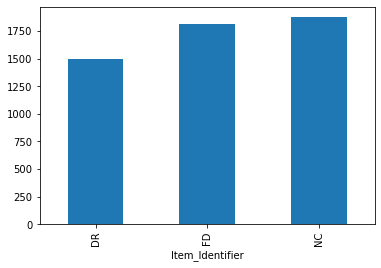

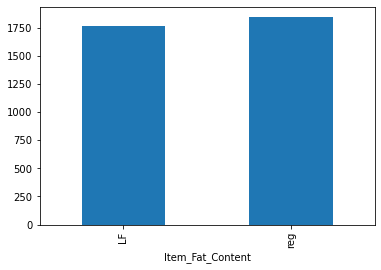

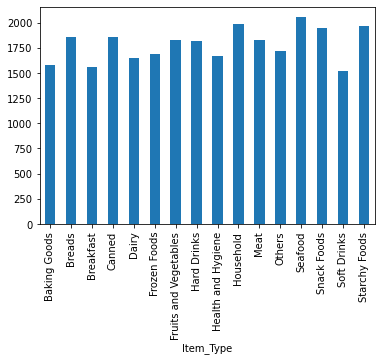

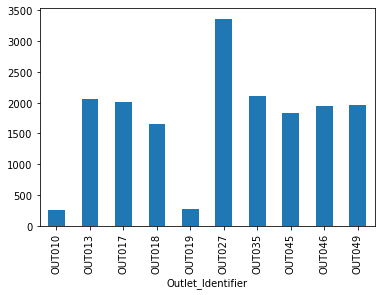

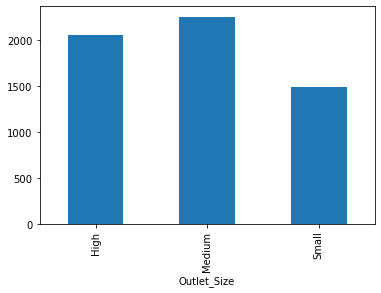

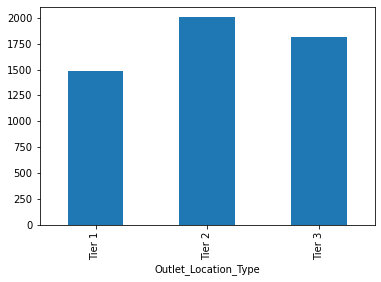

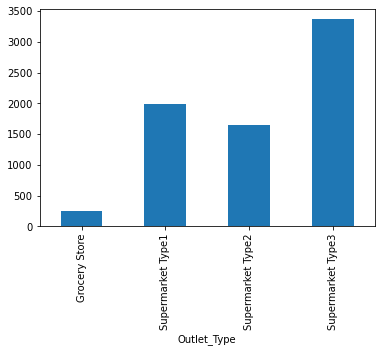

In [886]:
for feature in categorical_features:
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.show()

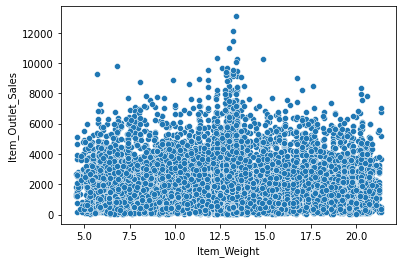

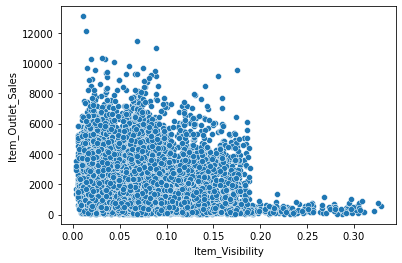

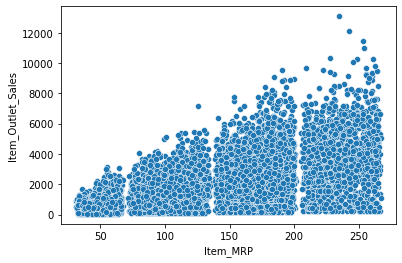

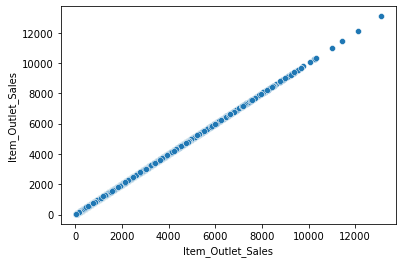

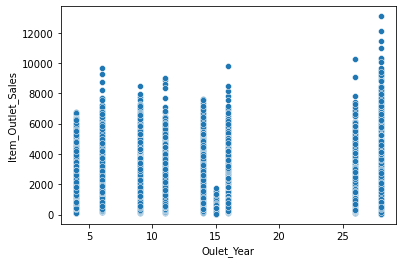

In [903]:
for feature in numerical_features:
    sns.scatterplot(x=data[feature],y=data['Item_Outlet_Sales'])
    plt.show()

In [910]:
disc_features=categorical_features+['Oulet_Year']

In [1078]:
si={}
for i in range(len(li)):
    si[li[i]]=i+1

In [7]:
categorical_features.append('Oulet_Year')

In [126]:
encoding=[]
for feature in categorical_features:
    si={}
    di=data.groupby(feature)['Item_Outlet_Sales'].median().to_dict()
    li=sorted(list(di.keys()),key=lambda x:di[x])
    for i in range(len(li)):
        si[li[i]]=i+1
    encoding.append(si)
    data[feature]=data[feature].map(si)

In [127]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Oulet_Year
0,2,9.30,1,0.016047,4,249.8092,6,3,1,3,3735.1380,6
1,1,5.92,2,0.019278,1,48.2692,3,3,2,2,443.4228,2
2,2,17.50,1,0.016760,9,141.6180,6,3,1,3,2097.2700,6
3,2,19.20,2,0.068513,10,182.0950,1,1,2,1,732.3800,1
4,3,8.93,1,0.061322,15,53.8614,8,2,2,3,994.7052,8


In [121]:
data=pd.read_csv('sales1.csv')

In [122]:
data=data.drop(columns='Unnamed: 0')

In [256]:
X=data1.drop(columns=['Item_Outlet_Sales'])

In [123]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='object']

In [97]:
categorical_features.append('Oulet_Year')

In [124]:
encoding=[]
for feature in categorical_features:
    si={}
    di=data.groupby(feature)['Item_Outlet_Sales'].median().to_dict()
    li=sorted(list(di.keys()),key=lambda x:di[x])
    for i in range(len(li)):
        si[li[i]]=i+1
    encoding.append(si)
    data[feature]=data[feature].map(si)

In [257]:
y=data1['Item_Outlet_Sales']

In [258]:
from sklearn.model_selection import GridSearchCV,train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [3]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [1280]:
data['Item_Visibility']=data['Item_Visibility'].apply(lambda x:x*100)

In [15]:
data.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Oulet_Year
Item_Identifier,1.000000,0.075943,-0.166111,-0.049326,0.401031,0.032517,-0.003558,-0.002165,-0.003544,-0.005342,0.011236,-0.006790
Item_Weight,0.075943,1.000000,-0.022152,-0.017736,0.038317,0.025821,0.002902,0.007985,-0.011449,-0.003429,0.012088,0.005994
Item_Fat_Content,-0.166111,-0.022152,1.000000,0.051586,-0.034525,0.006063,0.000696,0.004070,-0.003795,0.001648,0.018719,0.000286
Item_Visibility,-0.049326,-0.017736,0.051586,1.000000,-0.017154,-0.005061,-0.189620,-0.100871,-0.081487,-0.252875,-0.133940,-0.118329
Item_Type,0.401031,0.038317,-0.034525,-0.017154,1.000000,0.076230,0.008076,0.009858,0.009300,0.009470,0.052526,-0.002810
Item_MRP,0.032517,0.025821,0.006063,-0.005061,0.076230,1.000000,0.000805,-0.003800,0.001887,-0.000551,0.567574,0.004638
Outlet_Identifier,-0.003558,0.002902,0.000696,-0.189620,0.008076,0.000805,1.000000,0.219160,0.274526,0.847676,0.407932,0.715268
Outlet_Size,-0.002165,0.007985,0.004070,-0.100871,0.009858,-0.003800,0.219160,1.000000,-0.357162,0.262586,0.218509,-0.186516
Outlet_Location_Type,-0.003544,-0.011449,-0.003795,-0.081487,0.009300,0.001887,0.274526,-0.357162,1.000000,0.214351,0.099404,0.203073
Outlet_Type,-0.005342,-0.003429,0.001648,-0.252875,0.009470,-0.000551,0.847676,0.262586,0.214351,1.000000,0.470924,0.450832


In [259]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [260]:
regression=LinearRegression()

In [261]:
score=cross_val_score(regression,X_train,y_train,cv=5)

In [262]:
score.mean()

0.45331721314622814

In [263]:
regression.fit(X_train,y_train)

LinearRegression()

In [264]:
pred=regression.predict(X_test)

In [265]:
r2_score(y_test,pred)

0.4875478765673066

In [266]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,80]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

ridge_regressor.fit(X_train,y_train)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.87667e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.86594e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.86254e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.86146e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgW

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 80]},
             scoring='neg_mean_squared_error')

In [267]:
pred=ridge_regressor.predict(X_test)

In [268]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Oulet_Year
2311,2,14.300,1,0.130390,3,77.2328,9,1,3,3,9
7366,2,5.800,1,0.131697,4,89.4172,7,1,3,3,6
3979,2,14.000,1,0.068513,10,216.9192,7,1,3,3,6
4816,2,12.850,1,0.033247,13,172.4422,4,1,3,3,11
2538,2,7.235,1,0.058121,13,115.8834,9,1,3,3,9
...,...,...,...,...,...,...,...,...,...,...,...
2197,2,13.100,1,0.075731,4,167.5158,4,1,3,3,11
2625,2,6.425,1,0.010497,12,118.3808,7,1,3,3,6
5257,2,18.700,1,0.037836,10,111.1886,7,1,3,3,6
6722,2,14.150,1,0.068129,12,253.7014,4,1,3,3,11


In [269]:
r2_score(y_test,pred)

0.48673264454760057

In [270]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.747e+08, tolerance: 3.240e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.706e+08, tolerance: 3.268e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.495e+08, tolerance: 3.1

{'alpha': 5}
-1244885.4202498365


In [271]:
pred=lasso_regressor.predict(X_test)

In [272]:
r2_score(y_test,pred)

0.4869459552123073

In [273]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,-100,-90,-80,-70,-10,-5,-2,-1,1,5,10,20,30,35,40,45,50,55,100]}
elastic_regressor=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)

elastic_regressor.fit(X_train,y_train)
print(elastic_regressor.best_params_)
print(elastic_regressor.best_score_)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.752e+08, tolerance: 3.240e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.711e+08, tolerance: 3.268e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.496e+08, tolerance: 3.1

{'alpha': 1}
-1244034.8157445895


C:\Users\H p\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\H p\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\H p\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 913, in fit
    check_scalar(
  File "C:\Users\H p\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1480, in check_scalar
    raise ValueError(
ValueError: alpha == -100, must be >= 0.0.

------------

In [274]:
pred=elastic_regressor.predict(X_test)

In [275]:
r2_score(y_test,pred)

0.4873648780482689

In [276]:
from sklearn.tree import DecisionTreeRegressor

In [277]:
regressor=DecisionTreeRegressor(criterion='mse')

In [281]:
dec_regressor=GridSearchCV(estimator=regressor,param_grid=parameters)

In [280]:
parameters={'max_depth':[5,6,7]}

In [282]:
dec_regressor.fit(X_train,y_train)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: Futur

GridSearchCV(estimator=DecisionTreeRegressor(criterion='mse'),
             param_grid={'max_depth': [5, 6, 7]})

In [283]:
pred=dec_regressor.predict(X_test)

In [284]:
r2_score(y_test,pred)

0.42521889513750744

In [285]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [286]:
regressor=RandomForestRegressor(criterion='mse')

In [287]:
ran_regressor=GridSearchCV(estimator=regressor,param_grid=parameters,cv=10)

In [288]:
ran_regressor.fit(X_train,y_train)

C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\H p\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion '

GridSearchCV(cv=10, estimator=RandomForestRegressor(criterion='mse'),
             param_grid={'max_depth': [5, 6, 7]})

In [289]:
pred=ran_regressor.predict(X_test)

In [290]:
r2_score(y_test,pred)

0.45460292521385726

In [291]:
from sklearn import metrics

In [292]:
rmse= np.sqrt(metrics.mean_squared_error(y_test,pred))

In [293]:
rmse

1124.147492901367

In [294]:
ran_regressor.best_params_

{'max_depth': 5}

In [1012]:
data=pd.read_csv('sales1.csv')

# Using One hot encoding

In [1014]:
data=data.drop(columns='Unnamed: 0')

In [99]:
data=pd.get_dummies(data,columns=categorical_features,drop_first=True)

In [100]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Oulet_Year_6,Oulet_Year_9,Oulet_Year_11,Oulet_Year_14,Oulet_Year_15,Oulet_Year_16,Oulet_Year_26,Oulet_Year_28
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,19.20,0.068513,182.0950,732.3800,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.061322,53.8614,994.7052,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Using Rank Encoding

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Oulet_Year,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,14,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,4,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,14,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.200,0.068513,182.0950,732.3800,15,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.930,0.061322,53.8614,994.7052,26,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,26,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,11,1,0,1,0,0,...,1,0,0,0,1,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,9,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,4,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


# Using Item Identifiers

In [1175]:
data=data.drop(columns=['Item_Identifier//org'])

In [1136]:
categorical_features.append('Item_Identifier//org')

In [1189]:
disc_features.remove('Oulet_Year')

# Using SVR

In [28]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [25]:
regression=SVR(kernel='rbf')

In [26]:
regression.fit(X_train,y_train)

SVR()

In [27]:
pred=regression.predict(X_test)

In [29]:
r2_score(y_test,pred)

0.16970669758755463

In [32]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Oulet_Year']

# Using onehot encoding and label encoding mixed

In [33]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Oulet_Year']

In [34]:
disc_features=[feature for feature in categorical_features if len(data[feature].unique())<4]

In [36]:
label_features=[feature for feature in categorical_features if feature not in disc_features]

In [37]:
label_features

['Item_Type', 'Outlet_Identifier', 'Outlet_Type', 'Oulet_Year']

In [118]:
encoding=[]
for feature in categorical_features:
    di=data.groupby(feature)['Item_Outlet_Sales'].median().to_dict()
    encoding.append(di)
    data[feature]=data[feature].map(di)

In [39]:
data1=pd.get_dummies(data,columns=disc_features,drop_first=True)

In [91]:
X=data1.drop(columns=['Item_Outlet_Sales'])

In [92]:
y=data1['Item_Outlet_Sales']

In [174]:
data

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Oulet_Year
0,0,FD,9.300,LF,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,1,DR,5.920,reg,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,2,FD,17.500,LF,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,3,FD,19.200,reg,0.068513,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,15
4,4,NC,8.930,LF,0.061322,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8518,FD,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,26
8519,8519,FD,8.380,reg,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,11
8520,8520,NC,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,8521,FD,7.210,reg,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,4


In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler=StandardScaler()

In [132]:
scaled_train_data=scaler.fit_transform(X_train)

In [133]:
X_train=pd.DataFrame(scaled_train_data,columns=X_train.columns)

In [135]:
scaled_test_data=scaler.transform(X_test)

In [136]:
X_test=pd.DataFrame(scaled_test_data,columns=X_test.columns)

# Using Gradient Boosting technique()

In [142]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

regression=GradientBoostingRegressor()

parameters={'min_samples_split':[2,3,4],'min_samples_leaf':[1,2],'max_depth':[5]}

GB_regressor=GridSearchCV(estimator=regression,param_grid=parameters)

GB_regressor.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [143]:
GB_regressor.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [144]:
GB_regressor.best_score_

0.5706255984377777

In [79]:
pred=GB_regressor.predict(X_test)

In [80]:
r2_score(y_test,pred)

0.6195472328886825

In [132]:
from sklearn.ensemble import AdaBoostRegressor

In [133]:
regression=AdaBoostRegressor()

parameters={'n_estimators':[100,110]}

AB_regressor=GridSearchCV(estimator=regression,param_grid=parameters)

AB_regressor.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [100, 110]})

In [134]:
AB_regressor.best_params_

{'n_estimators': 100}

In [135]:
pred=AB_regressor.predict(X_test)

In [136]:
r2_score(y_test,pred)

0.49569024475972534

In [145]:
import pickle

In [146]:
pickle.dump(ran_regressor,open('bigmart_pred','wb'))

In [147]:
encoding

[{'DR': 1496.7184, 'FD': 1810.976, 'NC': 1874.8928},
 {'LF': 1765.0358, 'reg': 1844.5989},
 {'Baking Goods': 1577.946,
  'Breads': 1860.2452,
  'Breakfast': 1554.643,
  'Canned': 1860.2452,
  'Dairy': 1650.8510999999999,
  'Frozen Foods': 1687.1372,
  'Fruits and Vegetables': 1830.95,
  'Hard Drinks': 1816.6353,
  'Health and Hygiene': 1669.4935,
  'Household': 1981.4208,
  'Meat': 1829.6184,
  'Others': 1713.7692,
  'Seafood': 2055.3246,
  'Snack Foods': 1944.136,
  'Soft Drinks': 1518.024,
  'Starchy Foods': 1968.1048},
 {'OUT010': 250.3408,
  'OUT013': 2050.664,
  'OUT017': 2005.0567,
  'OUT018': 1655.1788,
  'OUT019': 265.3213,
  'OUT027': 3364.9532,
  'OUT035': 2109.2544,
  'OUT045': 1834.9448,
  'OUT046': 1945.8004999999998,
  'OUT049': 1966.1074},
 {'High': 2050.664, 'Medium': 2251.0698, 'Small': 1484.0682},
 {'Tier 1': 1487.3971999999999, 'Tier 2': 2004.058, 'Tier 3': 1812.3076},
 {'Grocery Store': 256.9988,
  'Supermarket Type1': 1990.742,
  'Supermarket Type2': 1655.1788,
  '

In [185]:
test_data=pd.read_csv('test.csv')

data=pd.read_csv('sales1.csv')

categorical_features=[feature for feature in data.columns if data[feature].dtype=='object']

test_data['Oulet_Year']=test_data['Outlet_Establishment_Year'].apply(lambda x:2013-x)

test_data=test_data.drop(columns='Outlet_Establishment_Year')

s=data.Outlet_Type.map({'Grocery Store':'Small'})

test_data.Outlet_Size=data.Outlet_Size.combine_first(s)

s=data.Outlet_Location_Type.map({'Tier 2':'Small'})

test_data.Outlet_Size=data.Outlet_Size.combine_first(s)

test_data['Item_Weight']=test_data['Item_Weight'].fillna(data.groupby('Item_Type')['Item_Weight'].transform('mean'))

di=data.groupby('Item_Type')['Item_Visibility'].mean().to_dict()

si=list(test_data[test_data['Item_Visibility']==0]['Item_Type'].index)

for i in si:
    test_data['Item_Visibility'].loc[i]=di[test_data['Item_Type'].loc[i]]

test_data['Item_Identifier']=test_data['Item_Identifier'].apply(lambda x: x[0:2])

test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].map({'LF':'LF','Regular':'reg','reg':'reg','low fat':'LF','Low Fat':'LF'})

i=0
for feature in categorical_features:
    test_data[feature]=test_data[feature].map(encoding[i])      
    i+=1

C:\Users\H p\AppData\Local\Temp\ipykernel_6124\1643888744.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Item_Visibility'].loc[i]=di[test_data['Item_Type'].loc[i]]


In [198]:
regressor=pickle.load(open('bigmart_pred','rb'))

In [187]:
predictions=regressor.predict(test_data)

In [195]:
submission_result=pd.DataFrame(predictions,columns=['Result'])

In [196]:
submission_result

,Result
0,1562.162396
1,1502.791302
2,589.231947
3,2518.838628
4,6012.947769
...,...
5676,2020.810255
5677,2686.882028
5678,2004.929415
5679,3773.311549


In [197]:
submission_result.to_csv('results.csv')

In [199]:
encoding

[{'DR': 1496.7184, 'FD': 1810.976, 'NC': 1874.8928},
 {'LF': 1765.0358, 'reg': 1844.5989},
 {'Baking Goods': 1577.946,
  'Breads': 1860.2452,
  'Breakfast': 1554.643,
  'Canned': 1860.2452,
  'Dairy': 1650.8510999999999,
  'Frozen Foods': 1687.1372,
  'Fruits and Vegetables': 1830.95,
  'Hard Drinks': 1816.6353,
  'Health and Hygiene': 1669.4935,
  'Household': 1981.4208,
  'Meat': 1829.6184,
  'Others': 1713.7692,
  'Seafood': 2055.3246,
  'Snack Foods': 1944.136,
  'Soft Drinks': 1518.024,
  'Starchy Foods': 1968.1048},
 {'OUT010': 250.3408,
  'OUT013': 2050.664,
  'OUT017': 2005.0567,
  'OUT018': 1655.1788,
  'OUT019': 265.3213,
  'OUT027': 3364.9532,
  'OUT035': 2109.2544,
  'OUT045': 1834.9448,
  'OUT046': 1945.8004999999998,
  'OUT049': 1966.1074},
 {'High': 2050.664, 'Medium': 2251.0698, 'Small': 1484.0682},
 {'Tier 1': 1487.3971999999999, 'Tier 2': 2004.058, 'Tier 3': 1812.3076},
 {'Grocery Store': 256.9988,
  'Supermarket Type1': 1990.742,
  'Supermarket Type2': 1655.1788,
  '

In [200]:
X_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Oulet_Year
7172,1874.8928,6.235000,1765.0358,0.118674,1981.4208,261.6910,1945.8005,1484.0682,1487.3972,1990.7420,16
8274,1810.9760,12.987880,1765.0358,0.104348,1944.1360,156.2630,3364.9532,2251.0698,1812.3076,3364.9532,28
6734,1810.9760,15.850000,1844.5989,0.121610,1577.9460,60.2220,2109.2544,1484.0682,2004.0580,1990.7420,9
2584,1810.9760,19.700000,1765.0358,0.041731,1687.1372,109.2912,2109.2544,1484.0682,2004.0580,1990.7420,9
3549,1874.8928,18.500000,1765.0358,0.034083,1713.7692,130.9284,1655.1788,2251.0698,1812.3076,1655.1788,4
...,...,...,...,...,...,...,...,...,...,...,...
6933,1874.8928,13.142314,1765.0358,0.075369,1669.4935,35.2532,3364.9532,2251.0698,1812.3076,3364.9532,28
7081,1810.9760,12.277108,1844.5989,0.205484,1577.9460,198.0110,265.3213,1484.0682,1487.3972,256.9988,28
3678,1810.9760,5.630000,1844.5989,0.024541,1829.6184,105.1306,1945.8005,1484.0682,1487.3972,1990.7420,16
5612,1810.9760,13.224769,1765.0358,0.037825,1830.9500,109.7228,265.3213,1484.0682,1487.3972,256.9988,28


,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Oulet_Year
0,0,FD,9.30,LF,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,1,DR,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,2,FD,17.50,LF,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,3,FD,19.20,reg,0.068513,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,15
4,4,NC,8.93,LF,0.061322,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26


In [3]:
data=pd.read_csv('sales1.csv')

In [2]:
import pandas as pd

In [4]:
data.describe()

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Oulet_Year
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,4261.000000,12.857890,0.070208,140.992782,2181.288914,15.168133
std,2460.522505,4.232804,0.048754,62.275067,1706.499616,8.371760
min,0.000000,4.555000,0.003575,31.290000,33.290000,4.000000
25%,2130.500000,9.310000,0.033085,93.826500,834.247400,9.000000
50%,4261.000000,12.867061,0.061322,143.012800,1794.331000,14.000000
75%,6391.500000,16.000000,0.094585,185.643700,3101.296400,26.000000
max,8522.000000,21.350000,0.328391,266.888400,13086.964800,28.000000


In [5]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [6]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [9]:
data['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [10]:
data['Outlet_Location_Type'].unique()


array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [11]:
data['Outlet_Type'].add_prefixunique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [12]:
dataset=pd.read_csv('train.csv')

In [13]:
dataset['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [16]:
data

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Oulet_Year
0,0,FD,9.300,LF,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,1,DR,5.920,reg,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,2,FD,17.500,LF,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,3,FD,19.200,reg,0.068513,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,15
4,4,NC,8.930,LF,0.061322,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8518,FD,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,26
8519,8519,FD,8.380,reg,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,11
8520,8520,NC,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,8521,FD,7.210,reg,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,4


In [17]:
data.drop(columns='Unnamed: 0',inplace=True)

In [18]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='object']

In [22]:
numerical_features.remove('Oulet_Year')

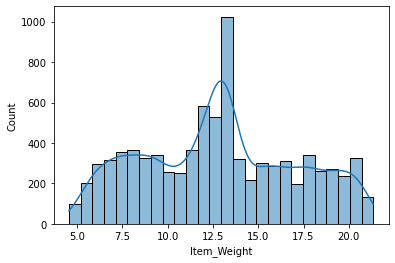

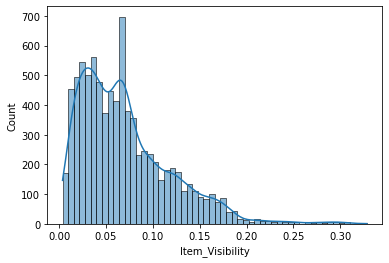

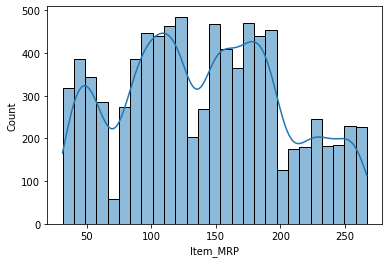

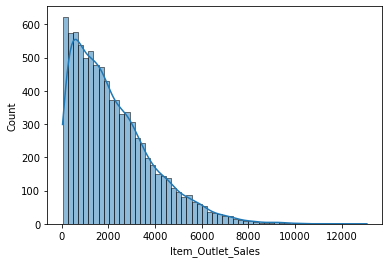

In [24]:
for feature in numerical_features:
    sns.histplot(data[feature],kde=True)
    plt.xlabel(feature)
    plt.show()

In [10]:
data=data.drop(columns='Unnamed: 0')

In [15]:
X=data.drop(columns='Item_Outlet_Sales')

In [16]:
y=data['Item_Outlet_Sales']

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
scaler=StandardScaler()

In [53]:
scaled_train_data=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [26]:
from sklearn.cluster import KMeans

In [54]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit_predict(scaled_train_data)
    wcss.append(kmeans.inertia_)

<AxesSubplot:>

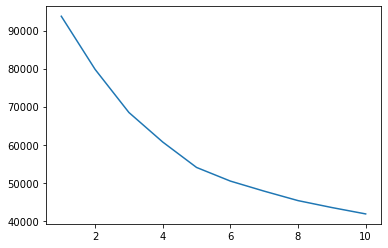

In [55]:
sns.lineplot(x=range(1,11),y=wcss)

In [34]:
#k=5

In [56]:
kmeans=KMeans(n_clusters=5,init='k-means++')
labels=kmeans.fit_predict(scaled_train_data)

In [58]:
scaled_train_data['labels']=labels

In [59]:
scaled_train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Oulet_Year,labels
0,0.177194,-0.840601,-0.738147,-1.110966,-0.961353,1.747454,0.110162,1.259641,-1.468287,0.138096,-0.139541,2
1,-3.010411,-1.639173,1.354743,-1.044692,-1.882229,-1.489023,-0.293273,1.259641,0.140511,-0.298724,-1.334103,4
2,0.177194,1.096763,-0.738147,-1.096345,0.278022,0.010040,0.110162,1.259641,-1.468287,0.138096,-0.139541,2
3,0.177194,1.498411,1.354743,-0.034773,0.287254,0.660050,-2.116073,-0.869861,0.140511,-2.118806,-0.020085,0
4,0.825520,-0.928018,-0.738147,-0.182270,1.330453,-1.399220,0.219876,0.703235,0.140511,0.138096,1.293934,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.177194,-1.415903,-0.738147,-0.275374,1.071961,1.180783,0.219876,0.703235,0.140511,0.138096,1.293934,2
8519,0.177194,-1.057964,1.354743,-0.476414,-1.466796,-0.527301,-0.060024,-0.869861,1.089966,0.138096,-0.497909,3
8520,0.825520,-0.533458,-0.738147,-0.718381,-0.832107,-0.897208,0.295898,-0.869861,1.089966,0.138096,-0.736822,3
8521,0.177194,-1.334392,1.354743,1.538681,1.071961,-0.607977,-0.293273,1.259641,0.140511,-0.298724,-1.334103,2


In [60]:
X_train,X_test,y_train,y_test=train_test_split(scaled_train_data,y,test_size=0.3)

In [80]:
scaled_train_data1=scaled_train_data[scaled_train_data['labels']==0]

In [81]:
scaled_train_data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Oulet_Year,labels
3,0.177194,1.498411,1.354743,-0.034773,0.287254,0.660050,-2.116073,-0.869861,0.140511,-2.118806,-0.020085,0
23,0.177194,-0.137218,-0.738147,-0.259505,-1.466796,-0.534739,-2.096636,-0.869861,-1.468287,-2.118806,1.532846,0
28,0.177194,-1.637991,1.354743,1.871922,-0.961353,-1.533355,-2.116073,-0.869861,0.140511,-2.118806,-0.020085,0
29,0.177194,-0.130461,1.354743,0.041304,0.490355,-1.563276,-2.096636,-0.869861,-1.468287,-2.118806,1.532846,0
30,0.177194,1.510225,-0.738147,2.054113,-0.961353,-1.368159,-2.116073,-0.869861,0.140511,-2.118806,-0.020085,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8469,0.177194,0.030712,1.354743,-1.048054,1.071961,0.661106,-2.096636,-0.869861,-1.468287,-2.118806,1.532846,0
8480,0.177194,0.030712,-0.738147,-0.068880,1.071961,0.217455,-2.096636,-0.869861,-1.468287,-2.118806,1.532846,0
8486,0.177194,1.687422,1.354743,-0.034773,0.287254,-1.517845,-2.116073,-0.869861,0.140511,-2.118806,-0.020085,0
8490,0.177194,0.086680,1.354743,0.658194,0.287254,0.343053,-2.096636,-0.869861,-1.468287,-2.118806,1.532846,0


In [88]:
li=list(scaled_train_data1.index)

In [90]:
y1=[]
for i in li:
    y1.append(y.loc[i])

In [97]:
scaled_train_data1['output']=y1

C:\Users\H p\AppData\Local\Temp\ipykernel_7140\425742458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_train_data1['output']=y1


In [100]:
data=scaled_train_data1.drop(columns='labels')

In [101]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(columns='output'),data['output'],test_size=0.3)

In [104]:
regressor=RandomForestRegressor()

In [105]:
ran_regressor=GridSearchCV(estimator=regressor,param_grid=parameters)

In [107]:
ran_regressor.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7]})

In [109]:
ran_regressor.best_score_

0.2554666891187491

In [110]:
pred=ran_regressor.predict(X_test)

In [112]:
r2_score(y_test,pred)

0.2903862261114788

In [ ]:
pred

In [128]:
data['labels']=labels

In [253]:
data1=data[data['labels']==3]

In [254]:
data1=data1.drop(columns='labels')

In [255]:
data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Oulet_Year
8,2,16.20,2,0.016687,6,96.9726,4,1,3,3,1076.5986,11
9,2,19.20,2,0.094450,6,187.8214,7,1,3,3,4710.5350,6
19,2,13.35,1,0.102492,4,230.5352,9,1,3,3,2748.4224,9
22,3,14.60,1,0.025698,15,196.5084,9,1,3,3,1587.2672,9
25,3,13.00,1,0.099887,15,45.9060,7,1,3,3,838.9080,6
...,...,...,...,...,...,...,...,...,...,...,...,...
8510,2,13.80,2,0.056862,13,231.5984,9,1,3,3,7182.6504,9
8513,2,12.00,2,0.020407,9,99.9042,9,1,3,3,595.2252,9
8514,2,15.00,2,0.054489,12,57.5904,4,1,3,3,468.7232,11
8519,2,8.38,2,0.046982,3,108.1570,4,1,3,3,549.2850,11
